감성분석 프로젝트
먼저 
ratings_test.txt
ratings_train.txt
를 심화기계학습자료실에서 다운 받아서 파일 업로드 후 시작
!!!코드를 순서대로 배열할수 있는가!!!


코딩의 중요성보다 
흐름
발표- 키워드 기존보드 대비 리그레이션  상승
긍부정키워드 설명 
프로젝트중 느낀것

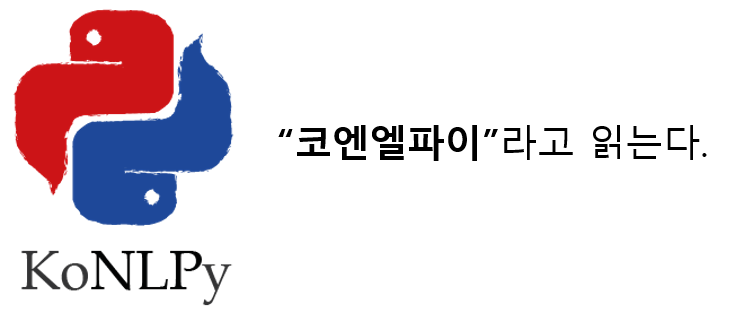

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,834 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

Text(0.5, 1.0, '안녕')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50504 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45397 missing from current font.
  font.set_text(s, 0, flags=flags)


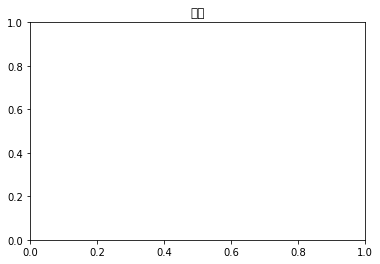

In [1]:
## colab 환경에서 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.title('안녕')

In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
## colab 환경에서 konlpy 설정 

%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

Process is terminated.


In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
## colab 환경에서 konlpy 설정 
# 왜 설치안됨?ㅋㅋ
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

Process is interrupted.


# 프로젝트(감성 분류 모델 만들기 w/ 리뷰 데이터)

In [7]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")
train_df = pd.read_table('ratings_train.txt')
test_df = pd.read_table('ratings_test.txt')
train_df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [8]:
test_df

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [9]:
test_df

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


# traing, test data 병합  
참고) https://yganalyst.github.io/data_handling/Pd_12/

* 원래는 train_set=150000건 // test_set=50000건 (75%:25%)이어서 학습할 데이터가 적어 정확도가 낮은 것일 수도 있겠다란 생각에서 착안된 방법 

* 따라서 75:25뿐만 아니라 90:10, 80:20, 60:40 등 다양한 샘플링 방법을 사용한다.

In [10]:
raw_df = train_df.append(test_df, ignore_index = True)
raw_df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
199995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
199996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
199997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
199998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [11]:
import re 
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", str(x)))
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", str(x)))

In [12]:
raw_df[raw_df['document'].isna()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0
155746,402110,NaN,1
157899,5026896,NaN,0
177097,511097,NaN,1


In [13]:
raw_df = raw_df[raw_df['document'].notnull()]
raw_df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
199995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
199996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
199997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
199998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [14]:
import re 
raw_df['document'] = raw_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", str(x)))
raw_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
199995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
199996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
199997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
199998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [15]:
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", str(x)))
test_df[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


# 워드 클라우드

In [16]:
stopwords = ['의','영화','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

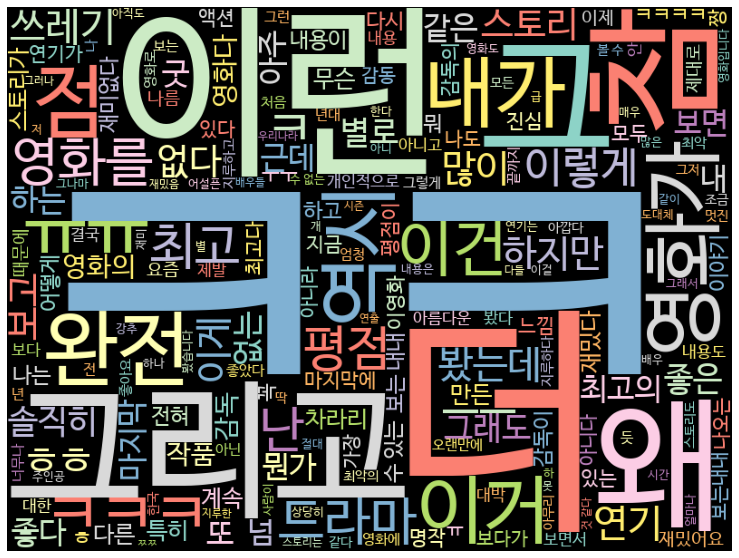

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = ['영화는','아','다','그냥','진짜','너무','의','정말','영화','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
%matplotlib inline

wordcloud1 = WordCloud(font_path='NanumBarunGothic.ttf',
                      stopwords = stopwords, 
                      colormap='Set3', 
                      background_color = 'black', 
                      width = 800, height = 600).generate(' '.join(raw_df['document']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()


# 전처리 시작

# Open Korea Text 토크나이져

In [18]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#stop_words = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
#tfidf = TfidfVectorizer(tokenizer = X_train, stop_words = stop_words, ngram_range=(1,2), min_df=3, max_df=0.9)

#tfidf.fit(X_train)
#train_tfidf = tfidf.transform(X_train)

In [19]:
raw_df

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
199995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
199996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따,0
199997,9072549,그림도 좋고 완성도도 높았지만 보는 내내 불안하게 만든다,0
199998,5802125,절대 봐서는 안 될 영화 재미도 없고 기분만 잡치고 한 세트장에서 다 해먹네,0


In [20]:
# 독립변수와 종속변수 X, y에 각각 분할
X = raw_df.drop("label", axis = 1)
y = raw_df['label']
X['document'], y

(0                                        아 더빙  진짜 짜증나네요 목소리
 1                              흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나
 2                                         너무재밓었다그래서보는것을추천한다
 3                               교도소 이야기구먼  솔직히 재미는 없다 평점 조정
 4         사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                 ...                        
 199995            오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함
 199996            의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따  
 199997                     그림도 좋고 완성도도 높았지만  보는 내내 불안하게 만든다
 199998         절대 봐서는 안 될 영화  재미도 없고 기분만 잡치고  한 세트장에서 다 해먹네
 199999                                           마무리는 또 왜이래
 Name: document, Length: 199992, dtype: object, 0         0
 1         1
 2         0
 3         0
 4         1
          ..
 199995    1
 199996    0
 199997    0
 199998    0
 199999    0
 Name: label, Length: 199992, dtype: int64)

In [21]:
raw_word_counts = raw_df['document'].apply(lambda x:len(x.split(' ')))
raw_word_counts

0          6
1          6
2          1
3          8
4         12
          ..
199995     9
199996    12
199997     9
199998    15
199999     3
Name: document, Length: 199992, dtype: int64

In [22]:
import plotly.figure_factory as ff
fig = px.histogram(raw_word_counts, template="plotly_dark", color=raw_word_counts,  
                   title= "문장 길이 시각화")
fig.update_layout(height = 600, width = 1000, hovermode = 'closest')
fig.show()

In [23]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Histogram(y=raw_word_counts)])
fig.update_layout(height = 700, width = 800, hovermode = 'closest')
fig.show()

Text(0, 0.5, 'Number of reviews')

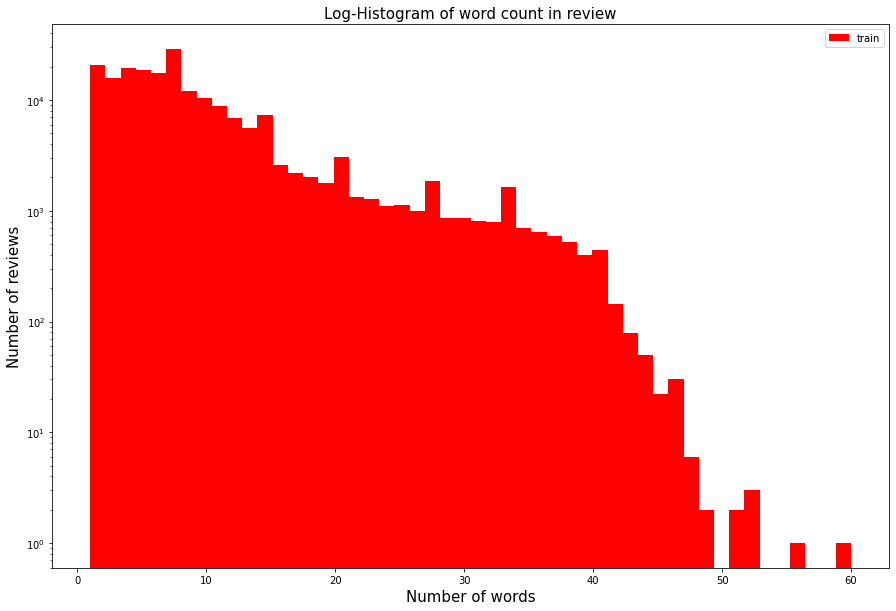

In [24]:
#raw_word_counts['train'] = train_df['document'].apply(lambda x:len(x.split(' ')))
#raw_word_counts['test'] = test_df['document'].apply(lambda x:len(x.split(' ')))

# 리뷰의 단어개수
plt.figure(figsize=(15,10))
plt.hist(raw_word_counts , bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review',fontsize=15)
plt.yscale('log',nonposy='clip')
plt.legend()
plt.xlabel('Number of words',fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

# okt에서 mecab을 쓰니 정확도 4%가 올랐다!!
* 나도 메캅을 써볼까
https://github.com/rickiepark/intro_ml_with_python_2nd_revised/blob/main/07.8.1-konlpy.ipynb

In [25]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [26]:
from sklearn.model_selection import train_test_split
# train, test 9:1로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=None, 
                                                    shuffle=True, 
                                                    stratify=y)

# train set 확인
X_train, y_train

(             id                                           document
 101177  4025872                                                   
 185687  7338880  이거도 시청률뺄라고 생 을하네 어지간하다 뭘어째야 시청자가좋아하는지 몰르나보네 짜증이빠이
 44065   1408205                                  모리스가 멋있어서  점 더 준다
 155717  8382363                           최고의 드라마 배우들 모두 흥해라  흥했다 
 177879   573712                                다소 지루하지만 영화 자체는 괜찮다
 ...         ...                                                ...
 152939  6283155                                             한마디로 ㅄ
 127583  8260580  시즌 부터는 단한번도 틀려본적도 재밌게본적도 없다  말이 모창이지 전혀 안비슷  시...
 4814    9054036                     좋은 연기  좋은 영화입니다  악역없는 영화가 좋아요 
 76053   8680379                    아무리 재밌다고 백날을 말해도 백문이 불여일견 이라 했음
 191937  6492712    이제하나씩유라나쁜짓한거밝혀지고여주남주행복한장면도 오회이상은나왓음좋겟어요질질끄니까짜즈으
 
 [179992 rows x 2 columns], 101177    1
 185687    0
 44065     0
 155717    1
 177879    1
          ..
 152939    0
 127583    0
 4814      1
 76053     1
 191937    0
 Name: label

In [27]:
# test set 확인
X_test, y_test

(             id                                           document
 138262  4637706                                            최고의 엔딩씬
 51126   7055579  러닝타임 모르고 봤다가 도대체 언제 끝나는거야 아 내가 본 영화중 정말 최고로 지루...
 186771  7405473  한 시간 동안 지루하게 전개되다 뒷 부분에 텔레반 몇 명 죽이고 끝  아무리 다큐처...
 147359  4629740                   네이버내에도 알바가 있나  쓰래기라니까 글삭제하네 어처구니
 173910  6757263                                            깔깔깔  버스
 ...         ...                                                ...
 27132   7692365                                           개똥철학만 잔뜩
 13889   8986401  내가 지금껏본 로맨스영화중 거의 일순위로 정말 달달하고 내용도 좋고 감동과 깨닫음까...
 155609  9979382                            ㅋㅋㅋ 솔직히 시리즈 중 젤 재미없긴 함 
 139644  8725964                     다시봐도 너무 감동적이다 나를 다시 되돌아 보게한 영화
 102795  7218554                                                꼴좋다
 
 [20000 rows x 2 columns], 138262    1
 51126     0
 186771    0
 147359    0
 173910    0
          ..
 27132     0
 13889     1
 155609    0
 139644    1
 102795    0
 Name: label,

In [28]:
!sudo apt-get install curl git
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.19).
git is already the newest version (1:2.17.1-1ubuntu0.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine

In [29]:
from konlpy.tag import Okt
okt = Okt()
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens

In [ ]:
from konlpy.tag import Okt
okt = Okt()
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens
    
import time
start = time.time()
#---------------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, ngram_range=(1,2), min_df=3 , max_df=0.9)
tfidf.fit(X_train['document'])
train_tfidf = tfidf.transform(X_train['document'])
test_tfidf = tfidf.transform(X_test['document'])
#----------------9:1로 나눴을때 18분 걸림-------
end = time.time() 
print('토큰화 수행 시간 :') 
print(end - start)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
#from konlpy.tag import Mecab
#mecab = Mecab()
#def mecab_tokenizer(text):
#    tokens = mecab.morphs(text)
#    return tokens 

#from konlpy.tag import Okt
#okt = Okt()
#import time
#start = time.time()
#---------------------------------------------
#from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer(tokenizer=mecab_tokenizer, ngram_range=(1,2), min_df=3 , max_df=0.9)
#tfidf.fit(X_train['document'])
#train_tfidf = tfidf.transform(X_train['document'])
#test_tfidf = tfidf.transform(X_test['document'])
#----------------9:1로 나눴을때 18분 걸림-------
#end = time.time() 
#print('토큰화 수행 시간 :') 
#print(end - start)


In [ ]:
# X_test tfidf 변환
start = time.time()
#----------------------------------------------
test_tfidf = tfidf.transform( X_test['document'] )
#-------------73초 걸림------------------------
end = time.time() 
print('토큰화 수행 시간 :') 
print(end - start)

In [ ]:
print(len(document) for document in X_train)

# --------------------------------------------------

In [ ]:
train_tfidf

In [ ]:
sorted(tfidf.vocabulary_.items())

In [ ]:
X_test['document']

# Twitter 토크나이져 14분 걸림
* 토큰화 모듈에 따라 정확도가 다른지 시험해보고 싶었지만 Twitter 모듈로 토큰화 진행한 tfidf가 정확도가 0.몇퍼 낮았음

In [ ]:
#from konlpy.tag import Twitter
#from sklearn.feature_extraction.text import TfidfVectorizer
#import time
#start = time.time()
#---------------------------------
#twitter = Twitter()
#tfv = TfidfVectorizer(tokenizer=twitter.morphs, ngram_range=(1,2), min_df=3, max_df = 0.9)
#tfv.fit(train_df['document'])

#t_train_tfidf = tfv.transform(train_df['document'])
#t_train_tfidf
#----------------------------------------------
#end = time.time() 
#print('토큰화 수행 시간 :') 
#print(end - start)

# 모델링하기전 마지막 확인

In [ ]:
train_tfidf, test_tfidf

In [ ]:
# 0,1의 비율을 동일하게 맞춤 => 업샘플링, 다운샘플링이 필요없음
y_train.value_counts()

In [ ]:
y_test.value_counts()

# 전처리 끝 대략 12분 이상

# 로지스틱 회귀
##### LogisticRegression(C=3, penalty='l2' , max_iter=100 , solver='newton-cg' random_state = 0 )
* 로지스틱 회귀 training accuracy : 93.19777325910864 %
* 로지스틱 회귀 testing accuracy : 85.74314458867532 %

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic#sklearn.linear_model.LogisticRegression

##### LogisticRegression( C=10, random_state = 0 ) : learning time = 12초
* 로지스틱 회귀 training accuracy : 96.16053868462282 %
* 로지스틱 회귀 testing accuracy : 85.54513270796248 %

##### train&test 비율 = 90:10로 바꾸니까
* 로지스틱 회귀 training accuracy : 93.1408062580559 %
* 로지스틱 회귀 testing accuracy : 86.405 %

##### 85:15 
* 로지스틱 회귀 training accuracy : 94.41624066873342 %
* 로지스틱 회귀 testing accuracy : 86.14287142904763 %

##### 95:5
* 로지스틱 회귀 training accuracy : 93.13241245712 %
* 로지스틱 회귀 testing accuracy : 86.32 %

### 06/13)

##### 90:10 LogisticRegression(C = 5, random_state=0) 
* 로지스틱 회귀 training accuracy : 94.42308547046535 %
* 로지스틱 회귀 testing accuracy : 86.48 %

##### 90:10 LogisticRegression(C=6, max_iter=1000, random_state=0)
* 로지스틱 회귀 training accuracy : 94.86588292813013 %
* 로지스틱 회귀 testing accuracy : 86.495 %
##### train, test가 잘나뉘어야 accuracy가 높다!!!!

### 6/14
##### 90:10 LogisticRegression(C = 4.5, random_state=0) 
* 로지스틱 회귀 training accuracy : 93.80916929641317 %
* 로지스틱 회귀 testing accuracy : 86.615 %

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score , recall_score
### 로지스틱 회귀 ###
start = time.time()
#----------------------------------------------
lr = LogisticRegression(C=4.5, random_state=0)

lr.fit( train_tfidf, y_train )
lr_pred = lr.predict( test_tfidf )
lr_acc = lr.score( test_tfidf, y_test )
#----------------------------------------------
print("로지스틱 회귀 training accuracy :", lr.score( train_tfidf , y_train )*100, "%")
print("로지스틱 회귀 testing accuracy :", lr_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report( y_test, lr_pred ))
print("--------------------------------------------------------------------------")
print(confusion_matrix( y_test, lr_pred ))
print("--------------------------------------------------------------------------")
#----------------------------------------------
end = time.time() 
print('로지스틱 회귀 수행시간 :') 
print(end - start)

plt.figure(figsize=(20, 20))
plot_confusion_matrix(lr , test_tfidf , y_test , cmap='Blues')
plt.title("<< Logistic Regression_박성호 >>")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

confusion_matrix(y_test, lr_pred)

print("정밀도:", precision_score(y_test, lr_pred))
print("재현율:", recall_score(y_test, lr_pred))

In [ ]:
plot_confusion_matrix(lr , test_tfidf , y_test , cmap='Blues')
plt.title("Logistic Regression_ ACC:86.6%")

plt.figure(figsize=(25, 25))

In [ ]:
# LogisticRegression Cross Validation
import numpy as np
from sklearn.model_selection import cross_val_score, cross_validate
scores_lr = cross_val_score(lr, train_tfidf, y_train , cv=5)
print("로지스틱 회귀 교차 검증 정확도: {}".format(scores_lr))
print("로지스틱 회귀 교차 검증 정확도:{} +/- {}".format(np.mean(scores_lr),np.std(scores_lr))) #정확도평균+-오차

# 로지스틱 회귀 Gridsearch CV
##### 참고 ) https://for-my-wealthy-life.tistory.com/39

In [ ]:
from sklearn.model_selection import GridSearchCV   #효과적인 하이퍼 파라미터 세팅을 찾아줌
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression( random_state = 0 )

params = {'C' : [3, 3.5, 4, 4.5, 5, 6],
          'max_iter' : [10, 50, 100, 1000],
          "penalty":["l1","l2"]
          }
lr_grid_cv = GridSearchCV(lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)
lr_grid_cv

In [ ]:
import time
start = time.time()
#----------------------------------------------
lr_grid_cv.fit(train_tfidf, y_train)
print("로지스틱 최적 점수 : {}".format(lr_grid_cv.best_score_))
print("로지스틱 최적 파라미터 : {}".format(lr_grid_cv.best_params_))
print(lr_grid_cv.best_estimator_)
#----------------------------------------------
end = time.time() 
print("--------------------------------------------------------------------------")
print('Execution time is:') 
print(end - start)

In [ ]:
train_tfidf

In [ ]:
from konlpy.tag import Okt
okt = Okt()
import time
start = time.time()
#---------------------------------------------
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf.fit(raw_df['document'])
raw_tfidf = tfidf.transform(raw_df['document'])
#----------------20분 걸림---------------------
end = time.time() 
print('토큰화 수행 시간 :') 
print(end - start)


In [ ]:
raw_tfidf, raw_df['label']

# GridsearchCV를 raw_df로 다시 돌려보자
Train set에서는 로지스틱 하이퍼 파라미터가 C=5, random_state=0 인데 test_set에는 반영이 안된 파라미터라서 raw_df로 다시 돌려본다.

그러면 정확도가 얼마나 향상될까

* 로지스틱 최적 점수 : 0.859494379775191
* 로지스틱 최적 파라미터 : {'C': 4, 'max_iter': 1000, 'penalty': 'l2'}
* LogisticRegression(C=4, max_iter=1000, random_state=0)

In [ ]:
import time
start = time.time()
#----------------------------------------------
lr_grid_cv.fit(raw_tfidf, raw_df['label'])
print("로지스틱 최적 점수 : {}".format(lr_grid_cv.best_score_))
print("로지스틱 최적 파라미터 : {}".format(lr_grid_cv.best_params_))
print(lr_grid_cv.best_estimator_)
#----------------------------------------------
end = time.time() 
print("--------------------------------------------------------------------------")
print('Execution time is:') 
print(end - start)

In [ ]:
#from sklearn.metrics import accuracy_score

#print('감정 분류 정확도 : ', round(accuracy_score(test_df['label'], test_predict), 3))

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

# Multiple Layer Perceptron
* 참고자료 https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier


In [ ]:
from sklearn.neural_network import MLPClassifier
start = time.time()
#----------------------------------------------
mlp = MLPClassifier()
mlp.fit( train_tfidf, train_df['label'] )
mlp_pred = mlp.predict( test_tfidf )
mlp_acc = mlp.score( test_tfidf , test_df['label'] )

print("Multiple Layer Perceptron training accuracy  :", mlp.score( train_tfidf, train_df['label'] )*100, "%")
print("Multiple Layer Perceptron test accuracy :", mlp_acc * 100, "%")

print("--------------------------------------------------------------------------")
print(classification_report( test_df['label'], mlp_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix( test_df['label'], mlp_pred))
print("--------------------------------------------------------------------------")
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)
plot_confusion_matrix(mlp, test_tfidf , test_df['label'], cmap='YlGn')
plt.title("<< Multiple Layer Perceptron >>")

# Gradient Boosting
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=gradientboostingclassifier#sklearn.ensemble.GradientBoostingClassifier

In [ ]:
### 그래디언트 부스팅 ###
start = time.time()
#----------------------------------------------
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(learning_rate=0.2 , 
                                    min_samples_leaf=30 ,
                                    n_estimators=150 )
gb_clf.fit( train_tfidf, y_train )
gb_pred = gb_clf.predict( test_tfidf )
gb_acc = gb_clf.score( test_tfidf, y_test )
print("그래디언트 부스팅 training accuracy :", gb_clf.score( train_tfidf, y_train )*100, "%")
print("그래디언트 부스팅 testing accuracy :", gb_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report( y_test , gb_pred ))
print("--------------------------------------------------------------------------")
print(confusion_matrix( y_test , gb_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix(gb_clf, test_tfidf , y_test , cmap='Orange')
plt.title("<<Gradient Boosting>>")
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)

# Ada Boost 
## 15분
* 에이다 부스팅 training accuracy : 81.71339044634821 %
* 에이다 부스팅 testing accuracy : 74.42046522791368 %

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=ada%20boost#sklearn.ensemble.AdaBoostClassifier

In [ ]:
### 에이다 부스트 ###
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#881초 15분
base_model = DecisionTreeClassifier(max_depth = 10)
ad_clf = AdaBoostClassifier(base_estimator = base_model,
                            n_estimators = 100,
                            random_state = 10,
                            learning_rate = 0.1)

start = time.time()
#----------------------------------------------
base_model = DecisionTreeClassifier(max_depth = 10)
ad_clf = AdaBoostClassifier(base_estimator = base_model,
                            n_estimators = 100,
                            random_state = 10,
                            learning_rate = 0.1)

ad_clf.fit( train_tfidf, y_train )
ad_pred = ad_clf.predict( test_tfidf )
ad_acc = ad_clf.score( test_tfidf,   y_test )
print("에이다 부스팅 training accuracy :", ad_clf.score( train_tfidf, y_train )*100, "%")
print("에이다 부스팅 testing accuracy :", ad_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test, ad_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, ad_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix(ad_clf, test_tfidf, y_test, cmap='RdGy')
plt.title("<< Ada Boost >>")
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)

# Light GBM
##### LGBMClassifier(n_estimators=1000, learning_rate=0.1)
* Light GBM training accuracy : 88.6016200540018 %
* Light GBM testing accuracy : 83.99903994239655 %

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, plot_confusion_matrix
from lightgbm import LGBMClassifier
import time
start = time.time()
# LGBM 분류기 객체 생성----------------------------------------------
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.1)
# 조기 중단 기능에 필요한 파라미터 정의----------------------------------------------
evals = [(test_tfidf, y_test)]
lgbm.fit(train_tfidf, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
lgbm_pred = lgbm.predict(test_tfidf)
pred_proba = lgbm.predict_proba(test_tfidf)[:,1]
lgbm_acc = lgbm.score( test_tfidf, y_test )
#----------------------------------------------
print("Light GBM training accuracy :", lgbm.score(train_tfidf, y_train )*100, "%")
print("Light GBM testing accuracy :", lgbm_acc * 100, "%")
#----------------------------------------------
print("--------------------------------------------------------------------------")
print(classification_report(y_test, lgbm_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, lgbm_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix(lgbm, test_tfidf, y_test, cmap='Purples')
print("--------------------------------------------------------------------------")
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)
plt.title("<< Light GBM >>")

In [ ]:
plot_confusion_matrix(lgbm, test_tfidf, y_test, cmap='Purples')
plt.title("<< Light GBM_박성호 >>")

# Light GBM 그리드 서치

In [ ]:
# 46분 걸림
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
start = time.time()
lgbm = LGBMClassifier()
parameters = {'learning_rate':[0.05, 0.1,  0.2],
              'num_leaves':[50, 60, 70],
              'max_depth': [10, 15, 20],
              'min_child_samples': [20, 40, 60],
              'subsample': [0.8, 1]} #Define the scoring
              
gscv_lgbm = GridSearchCV(lgbm, parameters, scoring='accuracy') 
gscv_lgbm.fit(train_tfidf, y_train)
print("LightGBM 최적 점수 : {}".format(gscv_lgbm.best_score_))
print("LightGBM 최적 파라미터 : {}".format(gscv_lgbm.best_params_))
print(gscv_lgbm.best_estimator_)
end = time.time() 
print('Execution time is:') 
print(end - start)

In [ ]:
pip install catboost

# SVM 시간 엄청 오래 걸림 주의 (3시간)
##### SVC(random_state=0)
* SVM training accuracy : 97.37524584152804 %
* SVM testing accuracy : 85.93715622937377 %

##### SVC(C=10, gamma=100, random_state=0)
* SVM training accuracy :
* SVM testing accuracy : 

In [ ]:
### 서포트 벡터 머신 ###
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
start = time.time()
#----------------------------------------------
svm_clf = SVC(random_state=0)
svm_clf.fit(train_tfidf, y_train)
svm_pred = svm_clf.predict(test_tfidf)
svm_acc = svm_clf.score(test_tfidf,  y_test )
#----------------------------------------------
print("SVM training accuracy :", svm_clf.score(train_tfidf, y_train )*100, "%")
print("SVM testing accuracy :", svm_acc * 100, "%")
#----------------------------------------------
print("--------------------------------------------------------------------------")
print(classification_report(y_test , svm_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test , svm_pred))
print("--------------------------------------------------------------------------")
#----------------------------------------------
plot_confusion_matrix(svm_clf, test_tfidf,  y_test, cmap='Oranges')
plt.title("<< Support Vector Machine >>")

end = time.time() 
print('Execution time is:') 
print(end - start)

# 캣부스트 
learning time이 실시간으로 출력되서 좋긴한데 오래걸림 
### 50분
* Cat Boost training accuracy : 83.89279642654756 %
* Cat Boost testing accuracy : 81.75490529431767 %

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
import time
start = time.time()
### 캣 부스트 ###
#----------------------------------------------
cb_clf = CatBoostClassifier()
cb_clf.fit( train_tfidf, y_train )
cb_pred = cb_clf.predict( test_tfidf )
cb_acc = cb_clf.score( test_tfidf , y_test )
#----------------------------------------------
print("Cat Boost training accuracy :", cb_clf.score( train_tfidf, y_train )*100, "%")
print("Cat Boost testing accuracy :", cb_acc * 100, "%")
#----------------------------------------------
print("--------------------------------------------------------------------------")
print(classification_report( y_test , cb_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix( y_test , cb_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix(cb_clf, test_tfidf , y_test, cmap='Reds')
plt.title("<< Cat Boost >>")
print("--------------------------------------------------------------------------")
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)

# XG Boost
참고 사이트
* https://velog.io/@highway92/XGBoost-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0%EB%93%A4
* https://www.kaggle.com/code/tilii7/hyperparameter-grid-search-with-xgboost/notebook

In [ ]:
pip install xgboost

In [ ]:
xgb_clf

In [ ]:
### XGBoost ###
from xgboost import XGBClassifier
start = time.time()
#----------------------------------------------
xgb_clf = XGBClassifier(max_depth=50, #트리의 최대 깊이, 일반적으로 3~10라고 하지만 NLP같은 복잡한 데이터셋에서는 초과해도 성능만 좋으면 괜찮다
                        n_estimators=100, #나무의 개수
                        #early_stopping_rounds = 200,
                        reg_alpha=1 , #L1 regularization, 특성이 매우 많은때 사용해볼만 함 
                        reg_lambda=0, #L2 규제(Ridge)
                        #subsample=1, #각 트리마다 데이터 샘플링 비율 over-fitting방지, 일반적으로 0.5 ~ 1을 사용
                        #colsample_bytree=1, #각 트리마다 feature 샘플링 비율, 일반적으로 0.5 ~ 1을 사용한다.
                        min_child_weight=5,
                        random_state=0)

xgb_clf.fit( train_tfidf, y_train )
xgb_pred = xgb_clf.predict( test_tfidf )
xgb_acc = xgb_clf.score(test_tfidf, y_test )
#----------------------------------------------
print("XGBoost training accuracy :", xgb_clf.score( train_tfidf, y_train )*100, "%")
print("XGBoost testing accuracy :", xgb_acc * 100, "%")
#----------------------------------------------
print("--------------------------------------------------------------------------")
print(classification_report( y_test , xgb_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix( y_test , xgb_pred))
print("--------------------------------------------------------------------------")
#----------------------------------------------
plot_confusion_matrix(xgb_clf, test_tfidf, y_test , cmap='Reds' )
plt.title("<< XGBoost >>")
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)
# XGBClassifier() => 70% 50초
# XGBClassifier(max_depth=7, min_child_weight=5, reg_alpha=1) => testing accuracy : 74.22% 120초
# XGBClassifier(max_depth=7, min_child_weight=5, reg_alpha=1, reg_lambda=0) => 74.28% 120초
# XGBClassifier(max_depth=9, min_child_weight=5, reg_alpha=1, reg_lambda=0) => 75.7
# XGBClassifier(max_depth=12, min_child_weight=5, reg_alpha=1, reg_lambda=0) => 76.47% 202초
# XGBClassifier(max_depth=20, min_child_weight=5, reg_alpha=1, reg_lambda=0) => 78.11% 331
# XGBClassifier(max_depth=25, min_child_weight=5, reg_alpha=1, reg_lambda=0) => 78.73% 403
# XGBClassifier(max_depth=23, min_child_weight=5, reg_alpha=1, reg_lambda=0) => 78.50%
# XGBClassifier(max_depth=27, min_child_weight=5, reg_alpha=1, reg_lambda=0) => 78.92% 7분
# XGBClassifier(max_depth=33, min_child_weight=5, reg_alpha=1, reg_lambda=0) => 79.53% 8분
# XGBClassifier(max_depth=40, min_child_weight=5, reg_alpha=1, reg_lambda=0) => 79.89% 10분
# XGBClassifier(max_depth=40, min_child_weight=5, n_estimators=500, reg_alpha=1, reg_lambda=0) => 82.85% 2841초
# XGBClassifier(max_depth=7, min_child_weight=5, n_estimators=1000, reg_alpha=1) => testing accuracy : 81.47% , Execution time is:1115.10 17분
# XGBClassifier(early_stopping_rounds=200, max_depth=40, min_child_weight=5,reg_alpha=1, reg_lambda=0) => 79.89% 588
# XGBClassifier(max_depth=45, min_child_weight=5, reg_alpha=1, reg_lambda=0) => acc=, time=
# XGBClassifier(max_depth=45, min_child_weight=5, reg_alpha=1, reg_lambda=0) => acc=80.09%, time=710
# XGBClassifier(max_depth=60, min_child_weight=5, reg_alpha=1, reg_lambda=0) => acc=80.6%, time=912
# XGBClassifier(max_depth=60, min_child_weight=5, n_estimators=500, reg_alpha=1) => 82.80% time=4378
# XGBClassifier(max_depth=10, min_child_weight=5, n_estimators=100, reg_alpha=1) =>

In [ ]:
plot_confusion_matrix(xgb_clf, test_tfidf, y_test , cmap='coolwarm' )
plt.title("<< XGBoost >>")

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import time
start = time.time()
# 랜덤 포레스트 분류기에  500개 의사 결정 트리를 사용한다.
#----------------------------------------------
rnd_clf = RandomForestClassifier(n_estimators=500) 
# 단어 묶음을 벡터화한 데이터와 정답 데이터를 가지고 학습을 시작한다.
rnd_clf.fit( train_tfidf, y_train ) #학습
rnd_clf_pred = rnd_clf.predict(test_tfidf) #X_test 예측
rnd_clf_acc = rnd_clf.score(test_tfidf, y_test ) # 정확도(Accuracy) 출력
#---------------------------------------------- 
print("랜덤포레스트 training accuracy  :", rnd_clf.score( train_tfidf, y_train )*100, "%")
print("랜덤포레스트 test accuracy :", rnd_clf_acc * 100, "%")
#----------------------------------------------
print("--------------------------------------------------------------------------")
print(classification_report(y_test, rnd_clf_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, rnd_clf_pred))
print("--------------------------------------------------------------------------")
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)
plot_confusion_matrix(rnd_clf, test_tfidf, y_test , cmap='YlGn')
plt.title("<< Random Forest >>")

# 나이브 베이즈

In [ ]:
train_tfidf

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.naive_bayes import ComplementNB
import matplotlib.pyplot as plt
start = time.time()
nb_clf = ComplementNB(alpha = 0.45)
nb_clf.fit(train_tfidf, y_train)
nb_pred = nb_clf.predict( test_tfidf )
nb_acc = nb_clf.score( test_tfidf , y_test )
print("Naive Bayes training accuracy :", nb_clf.score( train_tfidf , y_train )*100, "%")
print("Naive Bayes testing accuracy :", nb_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test, nb_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, nb_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix(nb_clf, test_tfidf , y_test, cmap='Greys')
plt.title("Complement Naive Bayes_박성호")
end = time.time() 
print("--------------------------------------------------------------------------")
print('Execution time is:') 
print(end - start)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
start = time.time()
nb_clf = BernoulliNB(alpha = 0.5)
nb_clf.fit( train_tfidf , y_train )
nb_pred = nb_clf.predict( test_tfidf )
nb_acc = nb_clf.score( test_tfidf , y_test )
print("Naive Bayes training accuracy :", nb_clf.score( train_tfidf , y_train )*100, "%")
print("Naive Bayes testing accuracy :", nb_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test, nb_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test, nb_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix(nb_clf, test_tfidf , y_test, cmap='Greys')
plt.title("<< Naive Bayes >>")
end = time.time() 
print("--------------------------------------------------------------------------")
print('Execution time is:') 
print(end - start)

In [ ]:
params = {'alpha': [0.3, 0.45, 0.5, 0.55, 0.8]
         }
nb_clf = ComplementNB()
nb_grid_cv = GridSearchCV(nb_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
import time
start = time.time()
#----------------------------------------------
nb_grid_cv.fit(train_tfidf, y_train)
print("나이브 베이즈 최적 점수 : {}".format(nb_grid_cv.best_score_))
print("나이브 베이즈 최적 파라미터 : {}".format(nb_grid_cv.best_params_))
print(nb_grid_cv.best_estimator_)
#----------------------------------------------
end = time.time() 
print("--------------------------------------------------------------------------")
print('Execution time is:') 
print(end - start)

# KNN
* KNN training accuracy : 74.21714057135237 %
* KNN testing accuracy : 59.13754825289518 %

In [ ]:
### K 최근접 이웃 ###
from sklearn.neighbors import KNeighborsClassifier

start = time.time()
#----------------------------------------------
knn_clf = KNeighborsClassifier()
knn_clf.fit( train_tfidf, y_train )
knn_pred = knn_clf.predict(test_tfidf)
knn_acc = knn_clf.score(test_tfidf,  y_test )
#----------------------------------------------
print("KNN training accuracy :", knn_clf.score(train_tfidf, y_train )*100, "%")
print("KNN testing accuracy :", knn_acc * 100, "%")
#----------------------------------------------
print("--------------------------------------------------------------------------")
print(classification_report(y_test , knn_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test , knn_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix(knn_clf, test_tfidf, y_test , cmap='Greens')
plt.title("<< K-Nearest Neighbors >>")
#----------------------------------------------
end = time.time() 
print("--------------------------------------------------------------------------")
print('Execution time is:') 
print(end - start)
#Execution time is : 977.3813071250916
#

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time
# n_neighbors에 따른 정확도를 넣을 array 준비
training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neighbors를 적용
neighbors_setting = range(1, 11)

start = time.time()
#----------------------------------------------
for n_neighbors in neighbors_setting:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit( train_tfidf, train_df['label'] )
    # 훈련 셋 정확도 저장
    training_accuracy.append(knn.score(  train_tfidf, train_df['label'] ))
    # 테스트 셋 정확도 저장
    test_accuracy.append(knn.score(test_tfidf,  test_df['label']))

plt.title("[ KNN Accuracy from n_neighbors ]")
plt.plot(neighbors_setting, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_setting, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)
plt.title("<< K-Nearest Neighbors >>")

# 모델 평가

In [ ]:
models_acc = {'Logistic Regression':lr_acc*100 , 
              'Naive Bayse':nb_acc*100 , 
              'Light GBM':lgbm_acc*100
              }
models_acc_df = pd.DataFrame(pd.Series(models_acc))
models_acc_df.columns = ['정확도']
models_acc_df['모델'] = ['Logistic Regression', 'Naive Bayse', 'Light GBM']
models_acc_df.set_index(pd.Index([1, 2 , 3]))

In [ ]:
models_acc = {'Logistic Regression':lr_acc*100 , 
              'Naive Bayse':nb_acc*100 , 
              'Light GBM':lgbm_acc*100
              }
models_acc_df = pd.DataFrame(pd.Series(models_acc))
models_acc_df.columns = ['정확도']
models_acc_df['모델'] = ['Logistic Regression', 'Naive Bayse', 'Light GBM']
models_acc_df.set_index(pd.Index([1, 2 , 3]))

import plotly.express as px
fig = px.bar(models_acc_df, x='정확도', y='모델' ,color='모델', range_x=(50,90), template="plotly_dark", text_auto='.4s',
            title="<< 최종 모델평가 >> 박성호" )
fig.update_traces(textfont_size=15, textangle=0, textposition="inside", cliponaxis=False)
fig.update_yaxes(categoryorder="total ascending")
fig.update_layout(height = 600, width = 1200, hovermode = 'closest')

In [ ]:
# 0413
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
models_acc = {'Logistic Regression':86.375 , 
              'Naive Bayse':86.460 , 
              'SVM':85.937, 
              'LighGBM':84.74 , 
              'Random Forest': 81.97 , 
              'K-NN':60.175 , 
              }

models_acc_df = pd.DataFrame(pd.Series(models_acc))
models_acc_df.columns = ['정확도']
models_acc_df['모델'] = ['Logistic Regression', 'Naive Bayse', 'SVM', 
                          'LighGBM', 'Random Forest', 'K-NN']
models_acc_df.set_index(pd.Index([1, 2 , 3 , 4 , 5 , 6]))

In [ ]:
import plotly.express as px
fig = px.bar(models_acc_df, x='정확도', y='모델' ,color='모델', range_x=(50,90), template="plotly_dark", text_auto='.4s',
            title="<<심화기계학습 최종 모델평가>> by 박성호" )
fig.update_traces(textfont_size=15, textangle=0, textposition="inside", cliponaxis=False)
fig.update_yaxes(categoryorder="total ascending")
fig.update_layout(height = 600, width = 1000, hovermode = 'closest')
fig.update_layout(coloraxis = {'colorscale':'Bluered_r'})

# GRU, LSTM

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['document'])

In [ ]:
print(tokenizer.word_index)

In [ ]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

In [ ]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import time
start = time.time()
# ----------------------------------------------
embedding_dim = 100
hidden_units = 256
#hidden_units = 128 로 했을때는 85% 정확도

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)
#----------------------------------------------
end = time.time() 
print('Execution time is:') 
print(end - start)


# 생성된 모델로 예측 수행


In [ ]:
# 새로운 텍스트를 직접 입력해 감성 예측 수행해봅시다!
st = input("감성을 분석할 문장을 입력하세요: ")

In [ ]:
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)

st = [" ".join(st)]
print(st)

In [ ]:
# 입력 텍스트의 벡터화
st_tfidf = tfidf.transform(st)

# 감성 분석 모델에 적용하여 예측
st_predict = nb_clf.predict(st_tfidf)

In [ ]:
# 예측값 출력
if(st_predict ==0):
    print(st, "->> 부정 감성")
else:
    print(st, "->> 긍정 감성")

# 네이버 뉴스 데이터 가져오기

In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json

# 각자가 발급받은 Naver API 정보를 입력합니다- https://developers.naver.com/apps/#/myapps/0Oa0z62LyTJsVFqAPBZW/overview
client_id = '0Oa0z62LyTJsVFqAPBZW'
client_secret = '5kGyr0QQ51'

#[CODE 1]
def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   #[CODE 1]
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):    
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    
    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    
    jsonResult.append({'cnt':cnt, 'title':title, 'description': description, 
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return    

#[CODE 0]
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']
 
    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):         
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  #[CODE 3]       
        
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]
       
    print('전체 검색 : %d 건' %total)
    
    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)
                        
        outfile.write(jsonFile)
        
    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))
    
if __name__ == '__main__':
    main()

In [ ]:
import json
file_name = '8월_naver_news.json'

with open(file_name, encoding='utf8') as j_f:
    data = json.load(j_f)

In [ ]:
import pandas as pd
df = pd.read_json('8월_naver_news.json', orient='records')

In [ ]:
with open('8월_naver_news.json', 'w') as fw:
    json.dump(cities, fw)

In [ ]:
import io
import pandas as pd
data = pd.read_csv(io.StringIO(uploaded['8월_naver_news.json.csv'].decode('utf-8')))
data

In [ ]:
# title 부분에 대한 데이터의 피처 벡터화를 통한 감성 분석
data_title_tfidf = tfidf.transform(data['title'])
data_title_predict = lr.predict(data_title_tfidf)
data['title_label'] = data_title_predict
data

In [ ]:
# description 부분에 대한 데이터의 피처 벡터화를 통한 감성 분석
data_description_tfidf = tfidf.transform(data['description'])
data_description_predict = lr.predict(data_description_tfidf)
data['description_label'] = data_description_predict


In [ ]:
# csv 파일로 저장 ---------------------------------------------
from google.colab import files
data.to_csv('predict_news.csv', encoding='utf-8') 
files.download('predict_news.csv')

In [ ]:
import pandas as pd
columns_name = ['title','title_label','description','description_label']
NEG_data_df = pd.DataFrame(columns=columns_name)
POS_data_df = pd.DataFrame(columns=columns_name)

for i, data in data.iterrows(): 
    title = data['title'] 
    description = data['description'] 
    t_label = data['title_label'] 
    d_label = data['description_label'] 
    
    if d_label == 0: # 부정 감성 샘플만 추출
        NEG_data_df = NEG_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
    else : # 긍정 감성 샘플만 추출
        POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
     
# 파일에 저장.
NEG_data_df.to_csv('predict_news_NES.csv', encoding='utf-8') 
POS_data_df.to_csv('predict_news_POS.csv', encoding='utf-8') 

In [ ]:
len(NEG_data_df), len(POS_data_df) #앞에가 부정 뒤에가 긍정  중요한 부분 !!!!! 긍정부정의 내용이 어디가 더 많은지

In [ ]:
POS_description = POS_data_df['description']

In [ ]:
POS_description_noun_tk = []

for d in POS_description:
    POS_description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출

In [ ]:
print(POS_description_noun_tk)

In [ ]:
POS_description_noun_join = []

for d in POS_description_noun_tk:
    d2 = [w for w in d if len(w) > 1] #길이가 1인 토큰 제외
    POS_description_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성

In [ ]:
POS_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)

In [ ]:
POS_vocab = dict() 

for idx, word in enumerate(POS_tfidf.get_feature_names()):
    POS_vocab[word] = POS_dtm.getcol(idx).sum()
    
POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True)

In [ ]:
POS_words = dict() 

for idx, word in enumerate(POS_tfidf.get_feature_names()):
    POS_vocab[word] = POS_dtm.getcol(idx).sum()
    
POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True)

In [ ]:
POS_words  #긍정 단어들 갯수

In [ ]:
print(POS_description_noun_join) 

In [ ]:
NEG_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)

In [ ]:
NEG_description = NEG_data_df['description']

NEG_description_noun_tk = []
NEG_description_noun_join = []

for d in NEG_description:
    NEG_description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출
    
for d in NEG_description_noun_tk:
    d2 = [w for w in d if len(w) > 1]  #길이가 1인 토큰은 제외
    NEG_description_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성

In [ ]:
print(NEG_description_noun_join)  

In [ ]:
NEG_vocab = dict() 

for idx, word in enumerate(NEG_tfidf.get_feature_names()):
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()
    
NEG_words = sorted(NEG_vocab.items(), key=lambda x: x[1], reverse=True)

In [ ]:
NEG_words #부정 단어들 갯수

In [ ]:
fig = px.bar(range(max), [i[1] for i in POS_words[:max]])
fig.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

max = 15  #바 차트에 나타낼 단어의 수 

plt.bar(range(max), [i[1] for i in POS_words[:max]], color="blue")
plt.title("Positive News Word High rank %d" %max, fontsize=15)
plt.xlabel("Word", fontsize=12)
plt.ylabel("Sum of TF-IDF", fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation=70)

plt.show()

In [ ]:
plt.bar(range(max), [i[1] for i in NEG_words[:max]], color="red")
plt.title("부정 뉴스의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation=70)

plt.show()

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 3번 스따트

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.StringIO(uploaded['연예인_naver_news.json.csv'].decode('utf-8')))
df

In [ ]:
df['title'] = df['title'].apply(lambda x : re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", str(x)))
df

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time
start = time.time()
#---------------------------------------------

tfidf.fit(df['title'])
data_title_tfidf = tfidf.transform(df['title'])
data_title_tfidf
#----------------9:1로 나눴을때 18분 걸림-------
end = time.time() 
print('토큰화 수행 시간 :') 
print(end - start)


In [ ]:
data_title_tfidf

In [ ]:
data_title_predict = lr.predict(data_title_tfidf)
data_df['title_label'] = data_title_predict

In [ ]:
def logistic_sentiment_predict(new_sentence):
  stop_words = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', (new_sentence))
  data_title_tfidf = tfidf.transform([str]).toarray(new_sentence)
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다. ✦‿✦ \n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다. ಠ‸ಠ \n".format((1 - score) * 100))

In [ ]:
logistic_sentiment_predict('강지혜 김남희 아나운서 아츠로이엔티와 전속계약 공식')